<a href="https://colab.research.google.com/github/suryagokul/Data-Science-Portfolio/blob/master/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv")

In [4]:
df[:5]

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


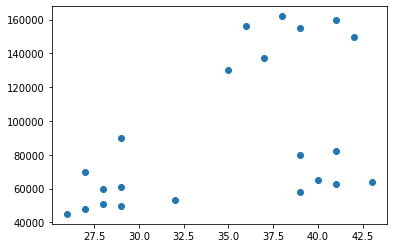

In [8]:
plt.scatter(df.Age,df['Income($)'])

In [9]:
from sklearn.cluster import KMeans

In [10]:
km = KMeans(n_clusters=3)

In [13]:
y_pred = km.fit_predict(df[['Age','Income($)']])

In [14]:
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [15]:
df['Cluster'] = y_pred

df[:5]

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [20]:
%matplotlib inline

Text(0, 0.5, 'Income($)')

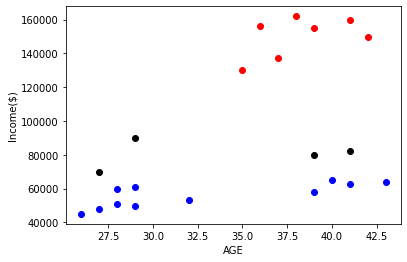

In [34]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]


plt.scatter(df1.Age,df1['Income($)'],color='blue')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')


plt.xlabel('AGE')
plt.ylabel('Income($)')

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [40]:
df[['Age','Income($)']] = scaler.fit_transform(df[['Age','Income($)']])

df[:5]

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [41]:
y_pred = km.fit_predict(df[['Age','Income($)']])

In [42]:
df['Cluster'] = y_pred

In [48]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

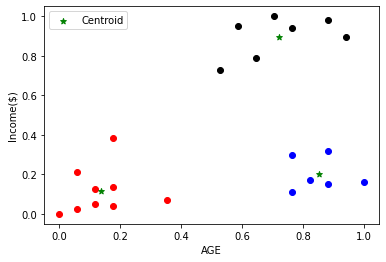

In [56]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]


plt.scatter(df1.Age,df1['Income($)'],color='blue')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='green',marker='*',label='Centroid')

plt.xlabel('AGE')
plt.ylabel('Income($)')
plt.legend()

In [71]:
SSE  = []
k_rng = range(1,11)
for k in k_rng:
  KM = KMeans(n_clusters=k)
  KM.fit(df[['Age','Income($)']])
  SSE.append(KM.inertia_)

In [72]:
SSE

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.3491047094419564,
 0.2664030124668415,
 0.22443334487241418,
 0.16858512236029755,
 0.1326541982724516,
 0.10497488680620905,
 0.08306428295966341]

Text(0, 0.5, 'SSE')

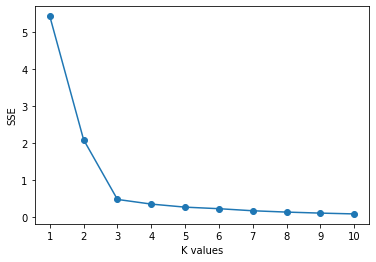

In [75]:
plt.plot(k_rng,SSE,marker='o')

plt.xticks(k_rng)

plt.xlabel('K values')
plt.ylabel('SSE')

Here k=3 is our elbow after that there is no change.It is constant.

# Clustering Iris Data

In [76]:
from sklearn.datasets import load_iris

In [77]:
iris = load_iris()

In [80]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [89]:
iris_df = pd.concat([pd.DataFrame(iris.data,columns=iris.feature_names),pd.DataFrame(iris.target,columns=['Flower'])],axis=1)

In [97]:
iris_df[:4]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [100]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Flower'],
      dtype='object')

In [90]:
X = iris_df.drop('Flower',axis=1)

y = iris_df['Flower']

In [95]:
model = KMeans(n_clusters=3)

model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [96]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

Text(0, 0.5, 'petal width')

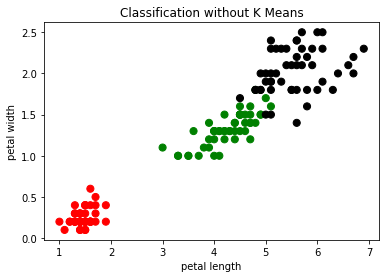

In [143]:
colormap = np.array(['Red','Green','Black'])

plt.scatter(X['petal length (cm)'],X['petal width (cm)'],c=colormap[iris.target],s=50)

plt.title("Classification without K Means")

plt.xlabel('petal length')
plt.ylabel('petal width')

Text(0.5, 1.0, 'Classification with K Means')

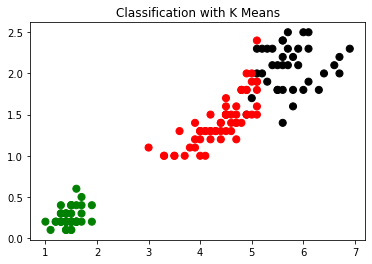

In [155]:
plt.scatter(X['petal length (cm)'],X['petal width (cm)'],c=colormap[model.labels_],s=50)

plt.title("Classification with K Means")

In [163]:
iris_df['Cluster no'] = model.labels_

In [166]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower,Cluster no
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2
